## Nobel Superposer

This notebook creates a superposition of 16 images. These are portraits of 16 Nobel prize winners, representing each of the Nobel prizes awarded for quantum mechanics up to 2017. The images and their sources can be found in the folder 'Nobel'.

The following lines set us up to create a quantum program.

In [1]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit, execute
from qiskit import register, available_backends, get_backend

#import Qconfig and set APIToken and API url
import sys
sys.path.append("../") # go to parent dir
import Qconfig
qx_config = {
    "APItoken": Qconfig.APItoken,
    "url": Qconfig.config['url']}
register(qx_config['APItoken'], qx_config['url'])

Now we create the program and define the number of qubits and bits it has, as well as the number of samples we'll use.

In [2]:
qubit = QuantumRegister(5)
bit = ClassicalRegister(5)
program = QuantumCircuit(qubit, bit)
shots = 1024

Each flag has a 5 bit string as a file name. We will use the 5 qubit `ibmqx4` device to create a superposition of all these 32 file names. This is done by creating a superposition of `0` and `1` on each qubit using the Hadamard gate.

In [3]:
program.h( qubit[0] )
program.h( qubit[1] )
program.h( qubit[2] )
program.h( qubit[3] )
program.h( qubit[4] )

The next cell executes the quantum program and gets the results. A simulator is used by default. To use the real device replace this with `'ibmqx4'` in `program.execute()`.

To do this, it first adds measure gates to all qubits, which are needed to extract the results. The job is then submitted, and results are checked for until they are found.

In [4]:
# add measure gates for all the qubits which place them on corresponding bits (we'll sort out which belong in b later)
for j in range(5):
    program.measure( qubit[j], bit[j] )

# set up backend
device ='local_qasm_simulator'
backend = get_backend(device)
print(backend.status)
    
# submit jobs
job = execute( program, backend, shots=shots )

# get the results
stats = job.result().get_counts()

{'available': True, 'pending_jobs': 0, 'name': 'ibmqx4'}


Now we process the results a little. Specifically, we do the following.
* The raw results contain a list of how many samples gave each bit string as a result. We want this to be a fraction instead, and so divide each bit by the number of samples used.
* The raw results are sorted according to the bit string values. We sort them from least likely to most likely instead

In [5]:
# calculate fractions
for bit_string in stats.keys():
    stats[bit_string] = stats[bit_string]/shots
# sort from least to most likely and create corresponding lists of the strings and fractions
sorted_strings = sorted(stats,key=stats.get)
sorted_fracs = sorted(stats.values())
n = len(stats) # it'll also be handy to know their lengths

The results are used to create a final image. This is a weighted average of all images whose filenames appear in `stats`, with the weighting gived by the fraction of samples for which that result occurred. These fractions are therefore used to calculate alpha values that will create this effect.

In [6]:
# construct alpha values such that the final image is a weighted average of the images specified by the keys of `stats`
alpha = [ sorted_fracs[0] ]
for j in range(0,n-1):
    alpha.append( ( alpha[j]/(1-alpha[j]) ) * ( sorted_fracs[j+1] / sorted_fracs[j] ) )

Finally we create the image by overlaying the source images (most likely first) with these alpha values.

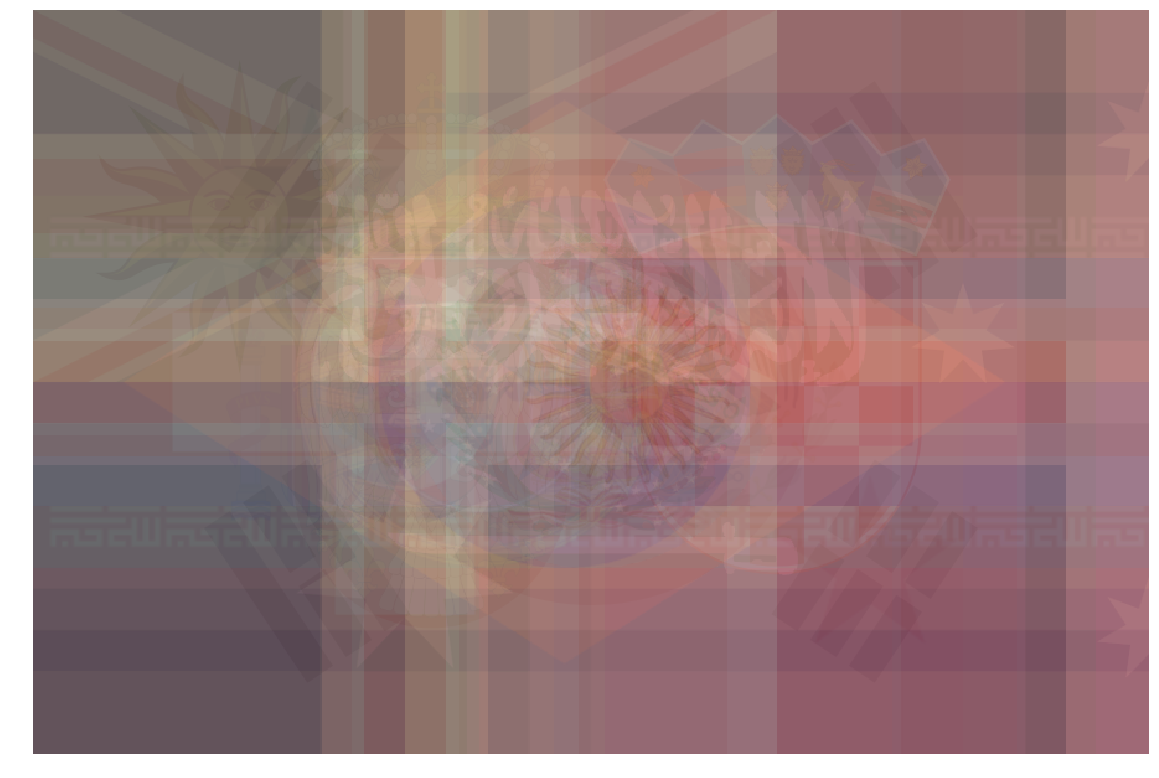

In [7]:
import matplotlib.pyplot as plt

plt.figure(2,figsize=(20,20))

for j in reversed(range(n)):
    image = plt.imread("wm-flags/"+sorted_strings[j]+".png")
    plt.imshow(image,alpha=alpha[j])
plt.axis('off')
plt.show()

To see what the raw data was doing, you can stare at the results below

In [10]:
for string, fraction in zip(sorted_strings,sorted_fracs):
    print(string,fraction)

00110 0.0126953125
10110 0.0166015625
10100 0.01953125
00101 0.0205078125
10111 0.0224609375
11001 0.0234375
11111 0.0234375
00010 0.0234375
10011 0.0263671875
10101 0.0263671875
11010 0.0263671875
11000 0.02734375
11101 0.0283203125
00100 0.0283203125
01011 0.0283203125
11011 0.029296875
11100 0.0302734375
00111 0.0302734375
00011 0.03125
10010 0.033203125
01000 0.0341796875
01111 0.0341796875
01001 0.03515625
10001 0.0361328125
01110 0.0361328125
11110 0.037109375
10000 0.0380859375
00000 0.0390625
01010 0.0400390625
00001 0.044921875
01100 0.0576171875
01101 0.0595703125
